# Stanford CME 241 (Winter 2025) - Assignment 3

**Due: Sunday, February 23 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/EugeneFrancisco/RL-book-Eugene

*Group members (replace below names with people in your group):* 
- Eugene Francisco
- Hakeem Shindy
- Nanxi Jiang

## Imports

In [274]:
import sys
import os

# Get the absolute path of the parent directory of the notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from typing import Iterable, Iterator, Mapping, TypeVar, Callable, Sequence, Tuple, Dict
from rl.distribution import Categorical
from rl.markov_process import FiniteMarkovRewardProcess
from rl.chapter10.prediction_utils import compare_td_and_mc
X = TypeVar('X')
S = TypeVar('S')

## Question 1: Milk Vendor Optimization Problem (Led by Nanxi Jiang)

You are a milk vendor and your task is to bring to your store a supply (denoted $S \in \mathbb{R}$) of milk volume in the morning that will give you the best profits. You know that the demand for milk throughout the course of the day is a probability distribution function $f$ (for mathematical convenience, assume people can buy milk in volumes that are real numbers, hence milk demand $x \in \mathbb{R}$ is a continuous variable with a probability density function). 

For every extra gallon of milk you carry at the end of the day (supply $S$ exceeds random demand $x$), you incur a cost of $h$ (effectively the wasteful purchases amounting to the difference between your purchase price and the end-of-day discount disposal price since you are not allowed to sell the same milk the next day). For every gallon of milk that a customer demands that you don’t carry (random demand $x$ exceeds supply $S$), you incur a cost of $p$ (effectively the missed sales revenue amounting to the difference between your sales price and purchase price). 

Your task is to identify the optimal supply $S$ that minimizes your **Expected Cost** $g(S)$, given by:

$$
g_1(S) = \mathbb{E}[\max(x - S, 0)] = \int_{S}^{\infty} (x - S) \cdot f(x) \, dx
$$

$$
g_2(S) = \mathbb{E}[\max(S - x, 0)] = \int_{-\infty}^{S} (S - x) \cdot f(x) \, dx
$$

$$
g(S) = p \cdot g_1(S) + h \cdot g_2(S)
$$

---

### Part (A): Analytical Optimization

1. **Derive the first-order condition (FOC)** for minimizing the expected cost $g(S)$.
2. **Solve the FOC** to express the optimal supply $S^*$ in terms of the given parameters: $p$, $h$, and the demand distribution $f(x)$. (*Hint*: Pay attention to the balance between the costs of overstocking and understocking)

3. **Interpretation**: Provide an interpretation of the condition you derived. What does the balance between $p$ and $h$ imply about the optimal supply $S^*$?

---

### Part (B): Special Case Analysis

1. Consider the case where the demand $x$ follows an **exponential distribution** with parameter $\lambda > 0$. That is, $f(x) = \lambda e^{-\lambda x}$ for $x \geq 0$.
    - Derive an explicit expression for the optimal supply $S^*$.
    
2. Consider the case where the demand $x$ follows a **normal distribution** with mean $\mu$ and variance $\sigma^2$, i.e., $x \sim \mathcal{N}(\mu, \sigma^2)$. 
    - Set up the integral for $g(S)$ and describe how it relates to the **cumulative distribution function (CDF)** of the normal distribution.
    - Provide an interpretation of how changes in $\mu$ and $\sigma$ influence the optimal $S^*$. 

---

### Part (C): Framing as a Financial Options Problem

1. Frame the milk vendor’s problem as a **portfolio of call and put options**:
    - Identify the analog of the “strike price” and “underlying asset.”
    - Explain which part of the cost function $g_1(S)$ or $g_2(S)$ corresponds to a call option and which part to a put option.
    - What do $p$ and $h$ represent in this options framework?

2. Explain how this framing could be used to derive the optimal supply $S^*$ if solved using financial engineering concepts.

---

### Part (D): Numerical Solution and Simulation

1. **Numerical Solution**: Write a Python function that numerically estimates the optimal $S^*$ using an iterative search or numerical optimization method. 

2. **Simulation**: Generate random samples of milk demand from an exponential distribution and simulate the total costs for different values of $S$. Plot the costs against $S$ and visually identify the optimal $S$.

### Part (A) Answer
We do the First-Order Condition begining by differentiating $g(S)$:
$$\frac{d}{dS} g_1(S) = -\int_{S}^{\infty} f(x) dx = -(1 - F(S))$$
$$\frac{d}{dS} g_2(S) = \int_{-\infty}^{S} f(x) dx = F(S)$$
Now,
$$\frac{d}{dS} g(S) = -p(1 - F(S)) + h F(S)$$
Setting $g'(S) = 0$,
$$p(1 - F(S)) = h F(S)$$
$$F(S^*) = \frac{p}{p + h}$$
Thus, the optimal supply is:
$$S^* = F^{-1} \left( \frac{p}{p + h} \right)$$
This means the optimal supply is higher if cost of understocking (p) is higher, and lower if the cost of overstocking (h) is higher, which makes sense.

### Part (B) Answer

1. Exponential Demand. We have the following CDF:
$$F(S) = 1 - e^{-\lambda S}$$
$$F(S^*) = \frac{p}{p+h}$$
$$1 - e^{-\lambda S^*} = \frac{p}{p+h}$$
$$S^* = -\frac{1}{\lambda} \ln \left( \frac{h}{p+h} \right)$$

2. Normal Demand
If $x \sim \mathcal{N}(\mu, \sigma^2)$, the CDF is:
$$F(S) = \Phi\left(\frac{S - \mu}{\sigma}\right)$$
($\Phi$ is the CDF of the standard normal distribution) Solving:
$$\Phi\left(\frac{S^* - \mu}{\sigma} \right) = \frac{p}{p+h}$$
$$S^* = \mu + \sigma \Phi^{-1} \left( \frac{p}{p+h} \right)$$
Interpretation: The optimal supply is a shifted mean, adjusting by a multiple of the standard deviation.

### Part (C) Answer

1. Identifying Analogies
Strike Price: The supply
Underlying Asset: The demand $g_1(S)$ is a call option payoff (missed sales). $p$ is the relative cost of missing sales, which could be different from business to business. 
$g_2(S)$ is a put option payoff (excess inventory cost). $h$ is the relative cost of overstocking, which could be different from business to business. 

2. This framing could be used to derive the optimal supply $S^*$ in American options, since you can excercise at any point within $N$ days. 

### Part (D) Answer

In [ ]:
# simulation parameters
p = 5  # Cost of understocking (per unit)
h = 2  # Cost of overstocking (per unit)
lambda_param = 1.0  # Parameter for exponential distribution

# Probability density function for demand
def demand_pdf(x):
    if x >= 0:
        return lambda_param * np.exp(-lambda_param * x)
    else:
        return 0

# Cumulative distribution function for demand
def demand_cdf(x):
    if x >= 0:
        return 1 - np.exp(-lambda_param * x)
    else:
        return 0

# Expected cost function g(S)
def expected_cost(S):
    # g1(S): Understocking cost
    g1 = p * (1 - demand_cdf(S))
    
    # g2(S): Overstocking cost (integral using CDF)
    g2 = h * demand_cdf(S)
    
    return g1 + g2

In [ ]:
result = minimize_scalar(expected_cost, bounds=(0, 10), method='bounded')
optimal_S = result.x

# Simulation of costs
S_values = np.linspace(0, 10, 500)
costs = [expected_cost(S) for S in S_values]

# Plotting the costs against S
plt.figure(figsize=(8, 5))
plt.plot(S_values, costs, label="Expected Cost $g(S)$", color='blue')
plt.axvline(optimal_S, color='red', linestyle='--', label=f"Optimal $S^* \\approx {optimal_S:.2f}$")
plt.xlabel("Supply $S$")
plt.ylabel("Expected Cost $g(S)$")
plt.title("Expected Cost $g(S)$ vs. Supply $S$ (Exponential Demand)")
plt.legend()
plt.grid(True)
plt.show()

optimal_S

## Question 2: Optimal Bank Cash Management with Risky Investments and Penalties (Led By: Hakeem Shindy)

Assume you are the owner of a bank where customers come in randomly every day to make cash deposits and to withdraw cash from their accounts. At the end of each day, you can borrow (from another bank, without transaction costs) any cash amount $y > 0$ at a constant daily interest rate $R$, meaning you will need to pay back a cash amount of $y(1 + R)$ at the end of the next day. Also, at the end of each day, you can invest a portion of your bank’s cash in a risky (high return, high risk) asset. Assume you can change the amount of your investment in the risky asset each day, with no transaction costs (this is your mechanism to turn any amount of cash into risky investment or vice-versa).

A key point here is that once you make a decision to invest a portion of your cash in the risky asset at the end of a day, you will not have access to this invested amount as cash that otherwise could have been made available to customers who come in the next day for withdrawals. More importantly, if the cash amount $c$ in your bank at the start of a day is less than $C$, the banking regulator will make you pay a penalty of $K \cdot \cot\left( \frac{\pi c}{2C} \right)$ (for a given constant $K > 0$).

For convenience, we make the following assumptions:
- Assume that the borrowing and investing is constrained so that we end the day (after borrowing and investing) with positive cash ($c > 0$) and that any amount of regulator penalty can be immediately paid (meaning $c \geq K \cdot \cot\left( \frac{\pi c}{2C} \right)$ when $c \leq C$).
- Assume that the deposit rate customers earn is so small that it can be ignored.
- Assume for convenience that the first half of the day is reserved for only depositing money and the second half of the day is reserved for only withdrawal requests.
- Assume that if you do not have sufficient cash to fulfill a customer withdrawal request, you ask the customer to make the withdrawal request again the next day.
- Assume all quantities are continuous variables.

---

### Part (A): MDP Modeling

Model the bank’s problem as a **Markov Decision Process (MDP)** with the goal of maximizing the **Expected Utility of assets less liabilities** at the end of a $T$-day horizon, conditional on any current situation of assets and liabilities.

1. **State Space**: Define the possible states of the system.
2. **Action Space**: Specify the possible actions available to the bank at each state.
3. **Transition Function**: Describe how the state evolves based on the current state and the chosen action.
4. **Reward Function**: Specify the reward structure that incentivizes optimal behavior.

*Note*: Be very careful with your notation; ensure that every subscript, index, superscript, prime, etc. is properly defined and necessary. There are a lot of variables at play, so everything must be properly defined or points will be deducted.

---

### Part (B): Reinforcement Learning Approach

In a practical setting, we do not know the exact probability distributions of the customer deposits and withdrawals. Neither do we know the exact stochastic process of the risky asset. But assume we have access to a large set of historical data detailing daily customer deposits and withdrawal requests, as well as daily historical market valuations of the risky asset. Assume we also have data on new customers as well as leaving customers (sometimes due to their withdrawal requests not being satisfied promptly).

Describe your approach to solving this problem with **Reinforcement Learning** by using the historical data described above.

1. Specify which **Reinforcement Learning algorithm** you would use, including any customizations for this problem.
2. Provide sufficient detail that will enable a programmer with knowledge of RL to implement your ideas.

*Note*: You are not expected to write any code for this part.

### Part (A) Answer

### State Space: 

$$s_t = (c_t, \ell_t)$$

where:
- $c_t \geq 0$ is the amount of cash available at the start of day $t$.
- $\ell_t \geq 0$ is the total amount of liabilities (unfulfilled withdrawals from previous days).

### Action Space:

$$a_t = (y_t, i_t)$$

where:
- $y_t \geq 0$ is the amount borrowed from another bank at the interest rate $R$.
- $i_t \geq 0$ is the amount of cash invested in the risky asset.

The action space must satisfy:

$$c_t + y_t - i_t > 0.$$

### Transition Function:

$$c_{t+1} = c_t + d_t - w_t + y_t - i_t + r_t i_t - (1+R) y_t,$$

$$\ell_{t+1} = \max(0, \ell_t + (w_t - c_t - y_t + i_t) \mathbf{1}_{w_t > c_t + y_t - i_t}).$$

where:
- $d_t$ is the amount of deposits received on day $t$ (random variable).
- $w_t$ is the amount of withdrawal requests on day $t$ (random variable).
- $r_t$ is the return on the risky asset (random variable).
- The indicator function $\mathbf{1}_{w_t > c_t + y_t - i_t}$ ensures that unfulfilled withdrawals carry over as liabilities.

### Reward Function:

$$U(c_t - \ell_t) - K \cdot \mathbf{1}_{c_t < C} \cot\left( \frac{\pi c_t}{2C} \right).$$

The bank's objective is to choose a policy $\pi(s_t) = (y_t, i_t)$ to maximize:

$$\mathbb{E} \left[ \sum_{t=0}^{T} R(s_t, a_t) \right].$$

### Part (B) Answer

Given that the state space is continuous (cash on hand, liabilities), and the transition dynamics are unknown, we adopt a Deep Q-Network (DQN) approach. This is a value-based reinforcement learning algorithm that estimates the optimal action-value function. We use a deep neural network (DNN) to approximate the Q-value function since tabular Q-learning is infeasible due to the continuous nature of the state-action space.

To tailor DQN to this banking problem, we apply the following modifications: Action Discretization: While cash borrowing and risky asset investment decisions are continuous, we discretize them into bins (e.g., borrowing and investment amounts chosen from a fixed set). This converts the problem into a discrete action space, making DQN applicable. Experience Replay for Stability: We maintain a replay buffer of past experiences $(s_t, a_t, r_t, s_{t+1})$ to break correlations in training and improve sample efficiency. The agent samples mini-batches from this buffer to update the Q-network. Target Network for Stabilization: We use a separate target Q-network to stabilize training, updating it periodically with weights from the main Q-network.

## Question 3: Career Optimization (Led By: Hakeem Shindy)

Imagine you live in a world where every job is an hourly-wage job. You have $H$ available hours in a day (for some fixed $H \in \mathbb{Z}^+$), and each morning when you leave your house, you can decide to split those $H$ hours into:

- Hours spent on learning to get better at your current job (call it $l \in \mathbb{Z}_{\geq 0}$),
- Hours spent on searching for another job (call it $s \in \mathbb{Z}_{\geq 0}$), and
- Remaining $H - l - s$ hours spent on actually working on your current job.

If your job currently pays you at an hourly-wage of $w$ dollars, then at the end of that day, you will be given a cash amount of $w \cdot (H - l - s)$ dollars. We assume that any hourly-wage $w$ in our world is an integer in the finite set $\{1, 2, \dots, W\}$ for some fixed $W \in \mathbb{Z}^+$.

Each employer has a wage model such that if you spend $l$ hours on learning on a given day where your hourly-wage was $w$, then the employer sends you an email the next morning with that new day’s hourly-wage of:  
$$\min(w + x, W)$$  
where $x$ is a Poisson random variable with mean $\alpha \cdot l$ for some fixed $\alpha \in \mathbb{R}^+$.

Each morning, with probability $\frac{\beta s}{H}$ for some fixed $\beta \in [0, 1]$, you will receive an email from another employer with a job-offer with hourly-wage of  
$$\min(w + 1, W)$$  
where $w$ was the hourly wage of the job you were on the previous day and $s$ is the number of hours you spent on job-search the previous day.

You read all your emails before you leave your house in the morning. If another job is offered to you and if the hourly-wage of that job is greater than your current employer’s hourly-wage stated in that morning’s email, then you accept the other job. Otherwise, you continue in your current job. Whichever job you decide to do, each morning when you leave your house, you decide how to split the $H$ hours of that day into learning hours, job-searching hours, and working hours.

Your goal is to maximize the **Expected (Discounted) Wages** earned over an infinite horizon (assume you never age and will live infinitely). The daily discount factor is a fixed $0 < \gamma < 1$.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the states, actions, rewards, state-transition probabilities, and discount factor. Be very precise with your notation!!

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (C): Solving for the Optimal Policy

Solve for the **Optimal Value Function** and **Optimal Policy** using **Value Iteration**. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `rl/dynamic_programming.py`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you).

---

### Part (D): Visualization

Plot a graph of the **Optimal Policy** (or print the optimal policy) for the following configuration:  
$H = 10$, $W = 30$, $\alpha = 0.08$, $\beta = 0.82$, $\gamma = 0.95$.  

Provide an intuitive explanation for this optimal policy.


### Part (A) Answer  

#### State Space:  

The state space $\mathcal{S}$ is defined as the worker's current wage level:  


$\mathcal{S} = \{w \mid w \in \{1, 2, \dots, W\} \}$

where $w$ represents the **current hourly wage**, an integer within the range $\{1, 2, \dots, W\}$. Terminal state is when $w = W$.

#### Action Space:  

The worker chooses how to allocate their daily hours between:  
- **Learning ($l$):** Increases the probability of wage growth in the current job.  
- **Job search ($s$):** Increases the probability of receiving a better job offer.  

Since the worker has $H$ hours available each day, the constraint is:


$0 \leq l + s \leq H$

Thus, the action space is:


$\mathcal{A} = \{(l, s) \mid l, s \in \mathbb{Z}_{\geq 0}, \ l + s \leq H \}$

#### Transition Function:  

The wage transition depends on two factors:  

1. **Learning ($l$ hours spent improving skills):**  
   Wage increases stochastically according to:

   
   $w' = \min(w + x, W)$

   where $x \sim \text{Poisson}(\alpha \cdot l)$, meaning the probability of moving to wage $w'$ is:

   
   $P(w' | w, l, s) = P(x + w = w') \cdot \left( 1 - \frac{\beta s}{H} \right)$
   

2. **Job search ($s$ hours spent looking for a new job):**  
   With probability $\frac{\beta s}{H}$, the worker receives a new job offer with wage:

   $w' = \min(w + 1, W)$

   The worker **accepts** the new job if $w' > w$.

Thus, the full transition function is:


$P(w' | w, (l, s)) =

\begin{cases} 
\frac{e^{-\alpha l} (\alpha l)^{(w' - w)}}{(w' - w)!} & \text{if } w + x < w' < W, \text{ (only focusing on getting a raise)} \\
\frac{e^{-\alpha l} (\alpha l)^{(w' - w)}}{(w' - w)!} \cdot \left( 1 - \frac{\beta s}{H} \right) & \text{if } w + x < w' < W, \text{ (getting a raise while job searching)} \\
\frac{\beta s}{H} & \text{if } w + 1 = w' < W \text{ (only focusing on getting new job)} \\
\left( 1 - \frac{e^{-\alpha l} (\alpha l)^{(w' - w)}}{(w' - w)!} \right) \cdot \frac{\beta s}{H} & \text{if } w + 1 < w' < W, \text{ (new job while trying to get raise)} \\
\left( 1 - \frac{e^{-\alpha l} (\alpha l)^{(w' - w)}}{(w' - w)!} \right) \cdot \left( 1 - \frac{\beta s}{H} \right) & \text{if } w = w' < W, \text{ (failing to get anything)} \\
\ {1} & \text{if } w' = w = W \\
0 & \text{w' < w}
\end{cases}

#### Reward Function:  

The worker's reward is their daily wage, given by:

$R(w, l, s) = w \cdot (H - l - s)$

where:
- $H - l - s$ represents **actual hours worked**.
- $w$ is the **current wage rate**.

#### Discount Factor  

Since the agent aims to **maximize expected discounted wages over an infinite horizon**, the discount factor is:

$
0 < \gamma < 1
$

which ensures the problem remains well-posed.


### Part (B) Answer

In [ ]:
import numpy as np

class JobMDP:
    def __init__(self, W, H, alpha, beta, gamma):
        self.W = W
        self.H = H
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def states(self):
        return range(1, self.W + 1)  # Hourly wage values

    def actions(self):
        actions = []
        for l in range(self.H + 1):
            for s in range(self.H - l + 1):
                actions.append((l, s))
        return actions

    def reward(self, state, action):
        l, s = action
        return state * (self.H - l - s)

    def transition_probabilities(self, state, action):
        l, s = action
        
        # Probability distribution for learning
        def poisson_prob(k, lmbda):
            return np.exp(-lmbda) * lmbda**k / np.math.factorial(k)
        
        learning_probs = {}
        for delta in range(0, self.W - state + 1):
            next_state = min(state + delta, self.W)
            learning_probs[next_state] = poisson_prob(delta, self.alpha * l)
        
        # Probability distribution for job search
        search_prob = self.beta * s / self.H
        search_next_state = min(state + 1, self.W)

        # Combine both probabilities
        transition_probs = {}
        for next_state in learning_probs:
            transition_probs[next_state] = learning_probs[next_state] * (1 - search_prob)
        
        if search_next_state in transition_probs:
            transition_probs[search_next_state] += search_prob
        else:
            transition_probs[search_next_state] = search_prob
        
        return transition_probs

    def step(self, state, action):
        transition_probs = self.transition_probabilities(state, action)
        next_states = list(transition_probs.keys())
        probabilities = list(transition_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        reward = self.reward(state, action)
        return next_state, reward

### Part (C) Answer

In [ ]:
import numpy as np

class JobMDP:
    def __init__(self, W, H, alpha, beta, gamma):
        self.W = W
        self.H = H
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def states(self):
        return range(1, self.W + 1)  # Hourly wage values

    def actions(self):
        actions = []
        for l in range(self.H + 1):
            for s in range(self.H - l + 1):
                actions.append((l, s))
        return actions

    def reward(self, state, action):
        l, s = action
        return state * (self.H - l - s)

    def transition_probabilities(self, state, action):
        l, s = action
        
        # Probability distribution for learning
        def poisson_prob(k, lmbda):
            return np.exp(-lmbda) * lmbda**k / np.math.factorial(k)
        
        learning_probs = {}
        for delta in range(0, self.W - state + 1):
            next_state = min(state + delta, self.W)
            learning_probs[next_state] = poisson_prob(delta, self.alpha * l)
        
        # Probability distribution for job search
        search_prob = self.beta * s / self.H
        search_next_state = min(state + 1, self.W)

        # Combine both probabilities
        transition_probs = {}
        for next_state in learning_probs:
            transition_probs[next_state] = learning_probs[next_state] * (1 - search_prob)
        
        if search_next_state in transition_probs:
            transition_probs[search_next_state] += search_prob
        else:
            transition_probs[search_next_state] = search_prob
        
        return transition_probs

    def step(self, state, action):
        transition_probs = self.transition_probabilities(state, action)
        next_states = list(transition_probs.keys())
        probabilities = list(transition_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        reward = self.reward(state, action)
        return next_state, reward

def value_iteration(mdp, epsilon=1e-6):
    V = np.zeros(mdp.W + 1)
    policy = {}
    iteration = 0

    while True:
        delta = 0
        for state in mdp.states():
            v = V[state]
            max_value = -float('inf')
            best_action = None
            for action in mdp.actions():
                transition_probs = mdp.transition_probabilities(state, action)
                expected_value = sum(prob * (mdp.reward(state, action) + mdp.gamma * V[next_state])
                                     for next_state, prob in transition_probs.items())
                if expected_value > max_value:
                    max_value = expected_value
                    best_action = action
            V[state] = max_value
            policy[state] = best_action
            delta = max(delta, abs(v - V[state]))
        iteration += 1
        if delta < epsilon:
            break

    return V, policy

# Example solving

H = 10
W = 30
alpha = 0.08
beta = 0.82
gamma = 0.95

mdp = JobMDP(W, H, alpha, beta, gamma)
V, policy = value_iteration(mdp)

for state in mdp.states():
    print(f"State {state}, Best action: {policy[state]}, Value: {V[state]:.2f}")

### Part (D) Answer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class JobMDP:
    def __init__(self, W, H, alpha, beta, gamma):
        self.W = W
        self.H = H
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def states(self):
        return range(1, self.W + 1)  # Hourly wage values

    def actions(self):
        actions = []
        for l in range(self.H + 1):
            for s in range(self.H - l + 1):
                actions.append((l, s))
        return actions

    def reward(self, state, action):
        l, s = action
        return state * (self.H - l - s)

    def transition_probabilities(self, state, action):
        l, s = action
        
        # Probability distribution for learning
        def poisson_prob(k, lmbda):
            return np.exp(-lmbda) * lmbda**k / np.math.factorial(k)
        
        learning_probs = {}
        for delta in range(0, self.W - state + 1):
            next_state = min(state + delta, self.W)
            learning_probs[next_state] = poisson_prob(delta, self.alpha * l)
        
        # Probability distribution for job search
        search_prob = self.beta * s / self.H
        search_next_state = min(state + 1, self.W)

        # Combine both probabilities
        transition_probs = {}
        for next_state in learning_probs:
            transition_probs[next_state] = learning_probs[next_state] * (1 - search_prob)
        
        if search_next_state in transition_probs:
            transition_probs[search_next_state] += search_prob
        else:
            transition_probs[search_next_state] = search_prob
        
        return transition_probs

    def step(self, state, action):
        transition_probs = self.transition_probabilities(state, action)
        next_states = list(transition_probs.keys())
        probabilities = list(transition_probs.values())
        next_state = np.random.choice(next_states, p=probabilities)
        reward = self.reward(state, action)
        return next_state, reward

def value_iteration(mdp, epsilon=1e-6):
    V = np.zeros(mdp.W + 1)
    policy = {}
    iteration = 0

    while True:
        delta = 0
        for state in mdp.states():
            v = V[state]
            max_value = -float('inf')
            best_action = None
            for action in mdp.actions():
                transition_probs = mdp.transition_probabilities(state, action)
                expected_value = sum(prob * (mdp.reward(state, action) + mdp.gamma * V[next_state])
                                     for next_state, prob in transition_probs.items())
                if expected_value > max_value:
                    max_value = expected_value
                    best_action = action
            V[state] = max_value
            policy[state] = best_action
            delta = max(delta, abs(v - V[state]))
        iteration += 1
        if delta < epsilon:
            break

    return V, policy

# Example Usage

H = 10
W = 30
alpha = 0.08
beta = 0.82
gamma = 0.95

mdp = JobMDP(W, H, alpha, beta, gamma)
V, policy = value_iteration(mdp)

states = list(mdp.states())
learn_hrs = [policy[state][0] for state in states]
search_hrs = [policy[state][1] for state in states]
work_hrs = [H - l - s for l, s in zip(learn_hrs, search_hrs)]

colors = []
for l, s in zip(learn_hrs, search_hrs):
    if l > 0:
        colors.append('b')  # blue for learning
    elif s > 0:
        colors.append('g')  # green for searching
    else:
        colors.append('r')  # red for working

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(states, learn_hrs, color='b', edgecolor='black', alpha=0.7, label='Learn')
plt.bar(states, search_hrs, bottom=learn_hrs, color='g', edgecolor='black', alpha=0.7, label='Search')
plt.bar(states, work_hrs, bottom=[l+s for l, s in zip(learn_hrs, search_hrs)], color='r', edgecolor='black', alpha=0.7, label='Work')

plt.xlabel("Hourly Wage ($)")
plt.ylabel("Hours")
plt.title("Optimal Policy for Different Hourly Wages")
plt.legend()

plt.show()

## Question 4: Car Sales (Led By: Nanxi Jiang)

Imagine you own a car which you need to sell within a finite window of $N$ days. At the beginning of each day, you receive an offer from a dealership which is randomly distributed over the interval $[m, M]$, $0 < m < M$, with a known continuous distribution $Q$ on this support; the offers each day are i.i.d. After receiving an offer, you have to decide immediately whether to accept or reject it. If you reject the offer, it is lost, and you have to pay a parking cost for the car of $c \geq 0$, which you must pay at the end of each day you do not sell the car. After $N$ days, the car has to be sold. The parameters $m$, $M$, and $c$ are all fixed positive real numbers. Your objective is to maximize the sale proceeds.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this problem fully as an **MDP** by specifying the following:
1. **States**: Define the state space
2. **Actions**: Specify the possible actions available to the seller
3. **Rewards**: Define the reward structure
4. **State-Transition Probabilities**: Specify the transition dynamics
5. **Discount Factor**: Indicate the discount factor

Additionally, discuss what particular kind of MDP this is.

---

### Part (B): Analytical Solution

Solve this MDP analytically for the **optimal policy**. Provide a detailed explanation of the steps used to derive the policy and any key conditions or assumptions required (*Note*: this is to be done mathematically, not using code).

---

### Part (C): Special Case Analysis

Consider the case where $c = 0$ and $Q(x) = U_{[m, M]}(x)$ (the uniform distribution on $[m, M]$). Solve for as closed-form a solution of the optimal policy **as possible**. To make this concrete, the functional form of your optimal policy should be explicitly defined but can depend on coefficients that are recursively defined. **You should not have integrals in your solution.**


### Part (A) Answer

1. The state space $\mathcal{S}$ is a collection of $N$ tuples $(t_k, n_k) \in \{1, ..., N\} \times [m,M]$, where the first arguement represents the number of days left to sell the car (indexed $N$ on the first day and $1$ on the final day, which is also termination). The price offered on day $k$ is $n_k \in [m,M]$
2. The action at every state is simple: $a \in (Sell, Wait)$
3. The reward is as follows: 
$$R(a_k) = 
\begin{cases}
n_k & a = Sell\\
-c & a = Wait
\end{cases}
$$
4. We want to determine the transition probabilities given the current state and actaion:
$$P(s'|s,a) = 
\begin{cases}
1 & a = Sell\\
Q(n_k) & a = Wait
\end{cases}
$$
The "wait" case is represented by the probablity distribution.

5. The discount factor is 1 since we assume that selling on any day is the same.

This is a finite horizon MDP; you have an option to pull the trigger any day and at the terminal state $1$, you must sell with a deterministic $n_N$ price.


### Part (B) Answer

We note that since we are given the pdf $Q$, we can obtain the expected value of every draw from $Q$. This is 
$$n_k = \int_{m}^M xQ(x) dx$$

On the last day $k = N$, the value is simply $n_N$. 

For $1 \leq k \leq N-1$ if the action is $Sell$, then the reward is $n_k$. Otherwise, the reward is $-c$ and the next state arrives.

$$V(t, n_k) = max(n_k, -c + \int_m^M V(t+1, n_{k+1})Q(n_{k+1}) dn_{k+1})$$
Thus, we should $Sell$ if $n_k \geq -c + \int_m^M V(t+1, n_{k+1})Q(n_{k+1}) dn_{k+1}$

### Part (C) Answer

Using part (b), we should sell if
$$n_k \geq -c + \int_m^M V(k+1, n_{k+1})Q(n_{k+1}) dn_{k+1}$$
$$n_k \geq \int_m^M V(k+1, n_{k+1}) \frac{1}{M-m} dn_{k+1}$$
We know that the last day has value $V(N,n_N) = n_N$. Furthermore, on day $k < N$, we should $sell$ if $n_k \geq E[V(k+1,n_{k+1})]$
$$E(V(k+1, n_{k+1}) = \int_m^M V(k+1, n_{k+1}) \frac{1}{M-m} dn_{k+1}$$
For $k = N-1$, 
$$E(V(k+1, n_{k+1}) = \int_m^M n_N \frac{1}{M-m} dn_{k+1} = \frac{m+M}{2}$$
Thus, the selling strategy for $n_{N-1}$ should be to sell if $n_{N-1} \geq $ $n_k \geq \frac{m+M}{2}$ and the remaining can be recursively determined.

## Question 5: Constrained Consumption (Led By: Hakeem Shindy)

Consider the following discrete-time MDP for constrained consumption. At $t = 0$, the agent is given a finite amount $x_0 \in \mathbb{R}^+$ of a resource. In each time period, the agent can choose to consume any amount of the resource, with the consumption denoted as $c \in [0, x]$ where $x$ is the amount of the resource remaining at the start of the time period. This consumption results in a reduction of the resource at the start of the next time period:  
$$x' = x - c.$$  

Consuming a quantity $c$ of the resource provides a utility of consumption equal to $U(c)$, and we adopt the **CRRA utility function**:  
$$
U(c) = \frac{c^{1 - \gamma}}{1 - \gamma}, \quad (\gamma > 0, \gamma \neq 1)
$$

Our goal is to maximize the aggregate discounted utility of consumption until the resource is completely consumed. We assume a discount factor of $\beta \in [0, 1]$ when discounting the utility of consumption over any single time period.

We model this as a **discrete-time, continuous-state-space, continuous-action-space, stationary, deterministic MDP**, and so our goal is to solve for the **Optimal Value Function** and associated **Optimal Policy**, which will give us the optimal consumption trajectory of the resource. Since this is a stationary MDP, the **State** is simply the amount $x$ of the resource remaining at the start of a time period. The **Action** is the consumption quantity $c$ in that time period. The **Reward** for a time period is $U(c)$ when the consumption in that time period is $c$. The discount factor over each single time period is $\beta$.

We assume that the **Optimal Policy** is given by:  
$$
c^* = \theta^* \cdot x \quad \text{for some } \theta^* \in [0, 1].
$$

---

### Part (A): Closed-form Expression for $V_\theta(x)$

Our first step is to consider a fixed deterministic policy, given by:  
$$c = \theta \cdot x \quad \text{for some fixed } \theta \in [0, 1].$$  
Derive a closed-form expression for the **Value Function** $V_\theta(x)$ for a fixed deterministic policy, given by $c = \theta \cdot x$. Specifically, you need to express $V_\theta(x)$ in terms of $\beta$, $\gamma$, $\theta$, and $x$.

---

### Part (B): Solving for $\theta^*$

Use this closed-form expression for $V_\theta(x)$ to solve for the $\theta^*$ which maximizes $V_\theta(x)$ (thus fetching us the **Optimal Policy** given by $c^* = \theta^* \cdot x$).

---

### Part (C): Expression for $V^*(x)$

Use this expression for $\theta^*$ to obtain an expression for the **Optimal Value Function** $V^*(x)$ in terms of only $\beta$, $\gamma$, and $x$.

---

### Part (D): Validation of the Bellman Equation

Validate that the **Optimal Policy** (derived in part B) and **Optimal Value Function** (derived in part C) satisfy the **Bellman Optimality Equation**.

### Part (A)

To derive the closed-form expression for the value function $V_{\theta}(x)$ for a fixed deterministic policy $c = \theta \cdot x$:

1. **Consumption and Resource Update**: The consumption at each time period $t$ is $c_t = \theta x_t$, and the remaining resource is $x_{t+1} = x_t - c_t = x_t (1 - \theta)$.

2. **Utility Calculation**: The utility at each period is $U(c_t) = \frac{(\theta x_t)^{1-\gamma}}{1 - \gamma}$.

3. **Discounted Sum**: The value function is the sum of discounted utilities:

   $$V_{\theta}(x) = \sum_{t=0}^{\infty} \beta^t \frac{(\theta x_t)^{1-\gamma}}{1 - \gamma}$$

4. **Geometric Series**: Substituting $x_t = x(1 - \theta)^t$ and simplifying, we get:

   $$V_{\theta}(x) = \frac{\theta^{1-\gamma} x^{1-\gamma}}{1 - \gamma} \sum_{t=0}^{\infty} (\beta (1 - \theta)^{1-\gamma})^t$$

5. **Summation**: The geometric series sum is $\frac{1}{1 - \beta(1 - \theta)^{1-\gamma}}$.

Thus, the closed-form expression is:

$$V_{\theta}(x) = \frac{\theta^{1-\gamma} x^{1-\gamma}}{(1 - \gamma)(1 - \beta(1 - \theta)^{1-\gamma})}$$

### Part (B)

To solve for the optimal consumption parameter $\theta^*$:

1. **Objective Function**: Maximize $V_{\theta}(x)$ with respect to $\theta$:

   $$f(\theta) = \frac{\theta^{1-\gamma}}{1 - \beta(1 - \theta)^{1-\gamma}}$$

2. **Derivative and Critical Point**: Solving the derivative condition leads to the equation:

   $$(1 - \theta)^{\gamma} = \beta (1 - \theta)^{1-\gamma}$$

3. **Simplification**: Solving gives $1 - \theta = \beta^{1/\gamma}$, hence:

   $$\theta^* = 1 - \beta^{1/\gamma}$$

Thus, the optimal consumption parameter is:

$$\theta^* = 1 - \beta^{1/\gamma}$$

### Part (C)

To find the optimal value function $V^*(x)$:

1. **Substitute $\theta^*$**: Substitute $\theta^* = 1 - \beta^{1/\gamma}$ into $V_{\theta}(x)$:

   $$V^*(x) = \frac{(1 - \beta^{1/\gamma})^{1-\gamma}}{1 - \gamma} \cdot \frac{x^{1-\gamma}}{1 - \beta(1 - \beta^{1/\gamma})^{1-\gamma}}$$

2. **Simplify**: Simplify the denominator and exponent terms to get:

   $$V^*(x) = \frac{x^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^{\gamma}}$$

Thus, the optimal value function is:

$$V^*(x) = \frac{x^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^{\gamma}}$$

### Part (D)

### Validation of the Bellman Optimality Equation:

1. **Bellman Equation**: Verify $V^*(x) = U(c^*) + \beta V^*(x - c^*)$.

2. **Substitute $c^* = \theta^* x$**: Calculate the right-hand side (RHS) and show it equals $V^*(x)$:

   $$U(c^*) + \beta V^*(x(1 - \theta^*)) = \frac{(\theta^* x)^{1-\gamma}}{1 - \gamma} + \beta \frac{(x(1 - \theta^*))^{1-\gamma}}{(1 - \gamma)(1 - \beta^{1/\gamma})^{\gamma}}$$

3. **Simplification**: Show that the RHS simplifies to $V^*(x)$ using $\theta^* = 1 - \beta^{1/\gamma}$.

Thus, the derived optimal value function satisfies the Bellman Optimality Equation.

## Question 6: TD and MC Algorithms (Led By: Eugene Francisco)

In this question, we explore the connection between **Temporal Difference (TD)** and **Monte Carlo (MC)** algorithms.

---

### Part (A): Implementing TD($\lambda$) Prediction Algorithm

Implement the **TD($\lambda$) Prediction algorithm** from scratch in Python code. First, implement it for the **Tabular case**. Next, implement it for the **Function Approximation case**.  

Provide clear and well-commented code for both implementations, and describe any assumptions or simplifications made.

---

### Part (B): Proof of MC Error as Sum of Discounted TD Errors

Prove that the **MC Error** can be written as the sum of discounted TD errors, i.e.,  
$$
G_t - V(S_t) = \sum_{u=t}^{T-1} \gamma^{u-t} \cdot \big( R_{u+1} + \gamma \cdot V(S_{u+1}) - V(S_u) \big)
$$

Work this out from scratch, rather than relying on general results from class or the textbook.

---

### Part (C): Code Extension

Extend `RandomWalkMRP` (in [rl/chapter10/random_walk_mrp.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter10/random_walk_mrp.py)) to `RandomWalkMRP2D` which is a random walk in 2-D with states $\{i, j) | 0 \leq i \leq B_1, 0 \leq j \leq B_2\}$ with terminal states as $(0, j)$ and $(B_1, j)$ for all $j$, $(i, 0)$ and $(i, B_2)$ for all $i$, and with reward of 0 for all $(0, j)$ and for all $(i, 0)$, reward of 1 for all $(B_1, j)$ and for all $(i, B_2)$, and with discrete probabilities of 4 movements - UP, DOWN, LEFT, RIGHT from any non-terminal state. Analyze the convergence of MC and TD on this `RandomWalkMRP2D` much like how we analyzed it for `RandomWalkMRP`, along with plots of similar graphs.

Only modify the code where the message `fill in` is noted.

### Part (A) Answer

In [ ]:
# We assume that episodes we see are in the form of a tuple (state, reward, next_state)

# As a clarification, the code below required much help from LLMs! I was pretty
# unclear about TD and MC algorithms, so LLMs helped me a lot to get the structure down
# of the algo in code.

#=========
# Tabular Verion
#==========
import numpy as np

class TDLambdaTabular:
    def __init__(self, numStates, alpha = 0.1, gamma = 0.9, lambd = 0.8):
        self.numStates = numStates
        self.alpha = alpha
        self.gamma = gamma
        self.lambd = lambd
        self.V = np.zeros(numStates)

    def train(self, episodes):
        for episode in episodes:
            E = np.zeros(self.numStates)

            for (state, reward, nextState) in episode:
                Vcurr = self.V[state]
                Vnext = self.V[nextState] if nextState is not None else 0.0

                delta = reward + self.gamma * Vnext - Vcurr
                E[state] += 1

                for s in range(self.numStates):
                    self.V[s] += self.alpha * delta * E[s]
                    # decay the trace now
                    E[s] *= self.gamma * self.lambd
                

    def getValueFunction(self):
        return self.V
    
# ==========
# Func approx case
# ==========

class TDLambdaFunctionApprox:
    def __init__(self, featureDim, alpha = 0.01, gamma = 0.9, lambd = 0.8):
        self.featureDim = featureDim
        self.alpha = alpha
        self.gamma = gamma
        self.lambd = lambd
        self.w = np.zeros(featureDim)

    def predict(self, features):
        # Standard linear prediction
        return np.dot(self.w, features)

    def train(self, episodes, featureFunc):
        # we assume that the user passes in some featureFunc to transform the data
        for episode in episodes:
            E = np.zeros(self.featureDim)

            for (state, reward, nextState) in episode:
                phi = featureFunc(state)
                phiNext = featureFunc(nextState) if nextState is not None else np.zeros(self.featureDim)

                Vcurr = np.dot(self.w, phi)
                Vnext = np.dot(self.w, phiNext)

                delta = reward + self.gamma * Vnext - Vcurr
                E = self.gamma * self.lambd * E + phi

                self.w += self.alpha * delta * E

    def getWeights(self):
        return self.w


Function Approximation Weights: [0.12219413 0.11874013]


**Part B Answer**

Recall that the definition of the MC return is
\begin{align*}
	G_t = R_{t + 1} + \gamma R_{t + 2} + \cdots + \gamma^{T - 1 - t}R_T.
\end{align*}
We want to show that $G_t - V(S_t) = \sum_{u = t}^{T - 1}\gamma^{u - t}[R_{u + 1} + \gamma V(S_{u + 1}) - V(S_u)]$. Rearranging the RHS of what we want to show, we see
\begin{align*}
	\sum_{u = t}^{T - 1}\gamma^{u - t}[R_{u + 1} + \gamma V(S_{u + 1}) - V(S_u)] &= \underbrace{\sum_{u = t}^{T - 1}\gamma^{u - t}R_{u + 1}}_{\triangle} + \underbrace{\sum_{u = t}^{T - 1}\gamma^{u - t + 1}V(S_{u + 1}) - \gamma^{u - t}V(S_{u})}_{\star}
\end{align*}
Notice that $\star$ is a telescoping sum which leaves behind only $-\gamma^0V(S_t)= -V(S_t)$, while $\triangle$ is precisely the definition of the return $G_t$ from above. Thus
\begin{align*}
	G_t - S(S_t) = \sum_{u = t}^{T - 1}\gamma^{u - t}[R_{u + 1} + \gamma V(S_{u + 1}) - V(S_u)]
\end{align*}
as we wish to show. $\Box$


### Part (C) Answer

In [284]:
class RandomWalkMRP2D(FiniteMarkovRewardProcess[int]):
    barrier: Tuple[int]
    p: Tuple[float]

    def __init__(
        self,
        barrier: Tuple[int],
        p: Tuple[float]
    ):
        self.barrier = barrier
        self.p = p
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> Mapping[Tuple[int], Categorical[Tuple[Tuple[int], float]]]:
        '''
        fill in the code below to define the dictionary, d, and then run the code in the next cell for the visualization
        '''
        d: Dict[Tuple[int], Categorical[Tuple[Tuple[int], float]]] = {
            (i, j): Categorical({
                ((i + 1, j), 0. if i < self.barrier[0] - 1 else 1.): self.p[0],
                ((i - 1, j), 0. ): 1 - self.p[0],

                ((i, j + 1), 0. if j < self.barrier[1] - 1 else 1.): self.p[1],
                ((i, j - 1), 0. ): 1 - self.p[1],
            })
        for i in range(1, self.barrier[0])
        for j in range(1, self.barrier[1])}
        return d

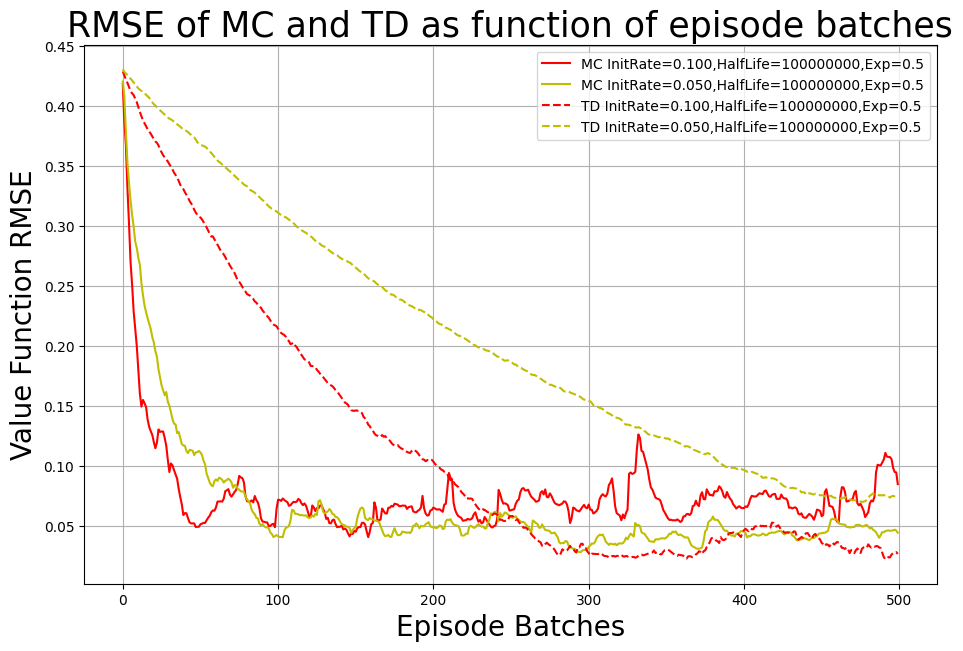

In [286]:
this_barrier: Tuple[int] = (10, 10)
this_p: Tuple[float] = (0.2, 0.3, 0.25, 0.25)
random_walk: RandomWalkMRP2D = RandomWalkMRP2D(
    barrier=this_barrier,
    p=this_p
)
compare_td_and_mc(
    fmrp=random_walk,
    gamma=1.0,
    mc_episode_length_tol=1e-6,
    num_episodes=3500,
    learning_rates=[(.1, 1e8, .5), (.05, 1e8, .5)],
    initial_vf_dict={s: 0.5 for s in random_walk.non_terminal_states},
    plot_batch=7,
    plot_start=0
)

## Problem 7: Double Q-Learning (Led By: Eugene Francisco)

It is known that **Q-Learning** can suffer from a maximization bias during finite-sample training. In this problem, we consider the following modification to the **Tabular Q-Learning** algorithm called **Double Q-Learning**:

---

### **Algorithm 1: Double Q-Learning**

**Initialize** $Q_1(s, a)$ and $Q_2(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** estimate of $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a \big( Q_1(s_t, a) + Q_2(s_t, a) \big)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; **if** with 0.5 probability **then**  
&emsp;&emsp;&emsp; $Q_1(s_t, a_t) \leftarrow Q_1(s_t, a_t) + \alpha \big( r_t + \gamma Q_2(s_{t+1}, \arg \max_a Q_2(s_{t+1}, a)) - Q_1(s_t, a_t) \big)$  

&emsp;&emsp; **else**  
&emsp;&emsp;&emsp; $Q_2(s_t, a_t) \leftarrow Q_2(s_t, a_t) + \alpha \big( r_t + \gamma Q_1(s_{t+1}, \arg \max_a Q_1(s_{t+1}, a)) - Q_2(s_t, a_t) \big)$  

&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** estimate of $Q$

---

### **Algorithm 2: Q-Learning**

**Initialize** $Q(s, a)$ $\forall s \in \mathcal{N}$, $a \in \mathcal{A}$  
**yield** $Q$

**while** True **do**  
&emsp; **select** initial state $s_0$, **set** $t = 0$  
&emsp; **while** $s_t \in \mathcal{N}$ **do**  
&emsp;&emsp; **select** $a_t$ using $\epsilon$-greedy based on this greedy policy: $\pi(s) = \arg \max_a Q(s_t, a)$  
&emsp;&emsp; **observe** $(r_t, s_{t+1})$  
&emsp;&emsp; $Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \big( r_t + \gamma Q(s_{t+1}, \arg \max_a Q(s_{t+1}, a)) - Q(s_t, a_t) \big)$  
&emsp;&emsp; $t = t + 1$  
&emsp;&emsp; $s_t = s_{t+1}$  

**yield** $Q$

---

### Instructions:
The code skeleton for this problem is provided below. Implement the following functions: `double_q_learning` and `q_learning`. Once implemented, you can run the code. You will get a graph of the estimated q-value plotted against the episode number. Comment on your observations, and explain the benefits/drawbacks of the double q-learning algorithm for general MDPs.

In [96]:
import sys
import os

# Get the absolute path of the parent directory of the notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)


import random
import numpy as np
import matplotlib.pyplot as plt

from dataclasses import dataclass
from collections import defaultdict
from typing import Mapping, Iterator, TypeVar, Tuple, Dict, Iterable, Generic

# RL imports (adapt or remove if you don't have the same environment):
from rl.distribution import (
    Distribution, Constant, Gaussian, Choose, SampledDistribution, Categorical
)
from rl.markov_process import NonTerminal, State, Terminal
from rl.markov_decision_process import MarkovDecisionProcess
from rl.td import epsilon_greedy_action

S = TypeVar('S')
A = TypeVar('A')

In [117]:
# -----------------------------------------------------------------------
# Tabular Q-value function approximation (done for you)
# -----------------------------------------------------------------------
class TabularQValueFunctionApprox(Generic[S, A]):
    """
    A basic implementation of a tabular function approximation 
    with constant learning rate of 0.1
    Also tracks the number of updates per (state, action).
    """
    def __init__(self):
        self.counts: Mapping[Tuple[NonTerminal[S], A], int] = defaultdict(int)
        self.values: Mapping[Tuple[NonTerminal[S], A], float] = defaultdict(float)
    
    def update(self, k: Tuple[NonTerminal[S], A], target: float) -> None:
        alpha = 0.1
        old_val = self.values[k]
        self.values[k] = (1 - alpha) * old_val + alpha * target
        self.counts[k] += 1
    
    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return self.values[x]

class AveragedQValueFunctionApprox(Generic[S, A]):
    def __init__(self, q1: TabularQValueFunctionApprox[S, A], q2: TabularQValueFunctionApprox[S, A]):
        self.q1 = q1
        self.q2 = q2

    def __call__(self, x: Tuple[NonTerminal[S], A]) -> float:
        return (self.q1(x) + self.q2(x)) / 2

In [ ]:
# Debugging this took way too long...

# -----------------------------------------------------------------------
# Double Q-Learning (fill in)
# -----------------------------------------------------------------------
def double_q_learning(
    mdp: MarkovDecisionProcess[S, A],
    states: Distribution[NonTerminal[S]],
    gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
    """
    Implements Double Q-Learning as described:
      1) We keep two Q-tables, Q1 and Q2.
      2) We choose actions epsilon-greedily with respect to Q1+Q2.
      3) With 50% chance we update Q1 using next-action chosen by max of Q2,
         otherwise update Q2 using next-action chosen by max of Q1.
    """
    q1: TabularQValueFunctionApprox[S, A] = TabularQValueFunctionApprox()
    q2: TabularQValueFunctionApprox[S, A] = TabularQValueFunctionApprox()

    qAvg = AveragedQValueFunctionApprox(q1, q2)
    yield qAvg

    while True:
        state: NonTerminal[S] = states.sample()
        t: int = 0
        while isinstance(state, NonTerminal):
            qAvg = AveragedQValueFunctionApprox(q1, q2)
            action: A = epsilon_greedy_action(
                qAvg,
                state,
                mdp.actions(state),
                0.1
            )
            next_state, reward = mdp.step(state, action).sample()
            if random.random() < 0.5:
                next_action = max(mdp.actions(next_state), key = lambda a: q1((next_state, a)))
                # next_return: float = max(
                #     q2((next_state, nextAction))
                #     for nextAction in mdp.actions(next_state)
                # ) if isinstance(next_state, NonTerminal) else 0
                next_return = q2((next_state, next_action)) if isinstance(next_state, NonTerminal) else 0
                q1.update(k = (state, action), target = reward + gamma * next_return)
            else:
                next_action = max(mdp.actions(next_state), key = lambda a: q2((next_state, a)))
                # next_return: float = max(
                #     q2((next_state, nextAction))
                #     for nextAction in mdp.actions(next_state)
                # ) if isinstance(next_state, NonTerminal) else 0
                next_return = q1((next_state, next_action)) if isinstance(next_state, NonTerminal) else 0
                q2.update(k = (state, action), target = reward + gamma * next_return)

            qAvg = AveragedQValueFunctionApprox(q1, q2)
            yield qAvg

            t += 1
            state = next_state

In [104]:
# -----------------------------------------------------------------------
# Standard Q-Learning (fill in)
# -----------------------------------------------------------------------
def q_learning(
  mdp: MarkovDecisionProcess[S, A],
  states: Distribution[NonTerminal[S]],
  gamma: float
) -> Iterator[TabularQValueFunctionApprox[S, A]]:
  """
  Standard Q-Learning:
    1) Keep one Q table
    2) Epsilon-greedy wrt that table
    3) Update Q((s,a)) with  r + gamma * max_{a'} Q((s_next, a'))
  """
  q: TabularQValueFunctionApprox[S, A] = TabularQValueFunctionApprox()
  yield q

  while True:
    state: NonTerminal[S] = states.sample()
    t: int = 0
    while isinstance(state, NonTerminal):
      action: A = epsilon_greedy_action(
        q,
        state,
        mdp.actions(state),
        0.1
      )
      next_state, reward = mdp.step(state, action).sample()
      next_return: float = max(
        q((next_state, a))
        for a in mdp.actions(next_state)
      ) if isinstance(next_state, NonTerminal) else 0.0
      q.update(k = (state, action), target = reward + gamma * next_return)
      yield q
      t += 1
      state = next_state

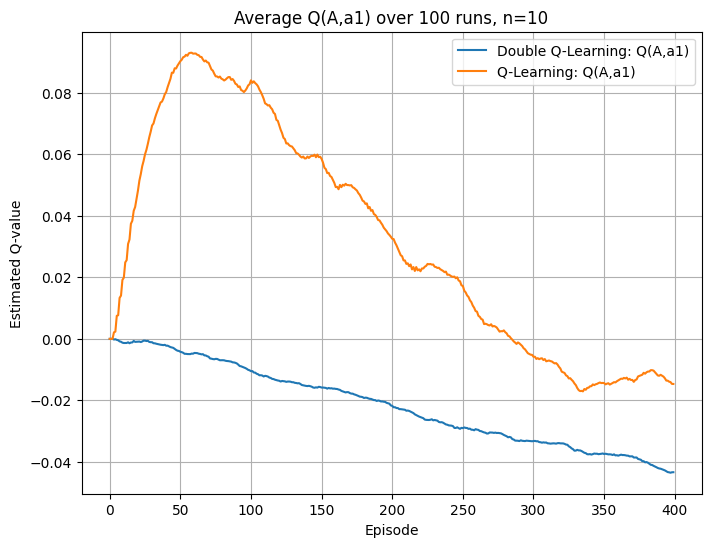

In [269]:
# -----------------------------------------------------------------------
# The MDP: States A,B and actions a1,a2,b1,...,bn (don't modify anything anymore, just run to get the graphs)
# -----------------------------------------------------------------------
@dataclass(frozen=True)
class P1State:
    """
    The MDP state, storing whether we are in "A" or "B".
    """
    name: str

class P1MDP(MarkovDecisionProcess[P1State, str]):
    
    def __init__(self, n: int):
        self.n = n

    def actions(self, state: NonTerminal[P1State]) -> Iterable[str]:
        """
        Return the actions available from this state.
          - if state is A => ["a1", "a2"]
          - if state is B => ["b1", ..., "bn"]
        """
        if state.state.name == "A":
            return ["a1", "a2"]
        else:
            return [f"b{i}" for i in range(1, self.n+1)]
    
    def step(
        self,
        state: NonTerminal[P1State],
        action: str
    ) -> Distribution[Tuple[State[P1State], float]]:
        """
        Return the distribution of (next state, reward) from (state, action):
          - A + a1 => reward 0, next state B
          - A + a2 => reward 0, next state terminal
          - B + b_i => reward ~ Normal(-0.1,1), next state terminal
        """
        if state.state.name == "A":
            if action == "a1":
                return Constant((NonTerminal(P1State("B")), 0.0))
            else:
                return Constant((Terminal(P1State("T")), 0.0))
        else:
            # For B + b_i => reward ~ N(-0.1,1), then terminal
            def sampler():
                r = np.random.normal(loc=-0.1, scale=1.0)
                return (Terminal(P1State("T")), r)
            return SampledDistribution(sampler)

def run_double_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Runs one 'chain' of Double Q-Learning for 'episodes' episodes,
    returning a list of Q-values for Q((A,a1)) at the end of each episode.
    """
    dq_iter = double_q_learning(mdp, start_dist, gamma)  # generator
    vals = []
    for _ in range(episodes):
        Q1 = next(dq_iter)
        # record Q1((A,a1)) each time
        qA1 = Q1((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def run_q_once(mdp, start_dist, gamma=1.0, episodes=400):
    """
    Same but for standard Q-Learning
    """
    q_iter = q_learning(mdp, start_dist, gamma)
    vals = []
    for _ in range(episodes):
        Q = next(q_iter)
        qA1 = Q((NonTerminal(P1State("A")), "a1"))
        vals.append(qA1)
    return vals

def main():
    # For reproducibility
    random.seed(0)
    np.random.seed(0)

    n = 10
    mdp = P1MDP(n)
    # Always start in A, as a NonTerminal
    start_dist = Constant(NonTerminal(P1State("A")))

    N_RUNS = 100
    N_EPISODES = 400

    all_dbl = []
    all_std = []

    for _ in range(N_RUNS):
        dbl_vals = run_double_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        std_vals = run_q_once(mdp, start_dist, gamma=1.0, episodes=N_EPISODES)
        all_dbl.append(dbl_vals)
        all_std.append(std_vals)

    arr_dbl = np.array(all_dbl)
    arr_std = np.array(all_std)

    avg_dbl = np.mean(arr_dbl, axis=0)
    avg_std = np.mean(arr_std, axis=0)

    plt.figure(figsize=(8,6))
    plt.plot(avg_dbl, label='Double Q-Learning: Q(A,a1)')
    plt.plot(avg_std, label='Q-Learning: Q(A,a1)')
    plt.xlabel('Episode')
    plt.ylabel('Estimated Q-value')
    plt.title('Average Q(A,a1) over 100 runs, n=10')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

**Graph Comments** I notice that the double Q learning algorithm is far more stable than the single Q learning algorithm, and doesn't suffer as much from overestimation bias. I understand this is partially because double Q learning essentially decouples the Q function to evaluate and select actions separately. One drawback is that, memory wise, the double Q learning algorithm uses double as much space. It is also more time consuming, since we need to change the map values of more maps than in the single Q learning algorithm. 

## Problem 8: Dice Rolling Game (Led By: Eugene Francisco)

Consider the following dice game. You start with $N$ $K$-sided dice on the table, and no dice in your hand. The values on the dice faces are $\{1, 2, ..., K\}$. While you have dice remaining on the table, the game proceeds as follows:

1. **Roll all the dice on the table.**  
2. **Select a nonempty subset of the dice on the table to move to your hand.**  
   - The dice you move to your hand keep the value which they were just rolled.  
   - For example, if your hand is $\{1, 3\}$ and you roll $\{2, 2, 3, 4\}$ on the table, and you decide to move the dice with $3$ and $4$ to your hand, you will now have $\{1, 3, 3, 4\}$ in your hand.

The game ends when you have no dice on the table left to roll. Your score for the game is then calculated as the sum of the values of dice in your hand **if you have at least $C$ 1’s in your hand**, and zero otherwise. For example:
- For $N = K = 4$ and $C = 2$, the score corresponding to a hand containing $\{1, 3, 1, 4\}$ would be $9$, while the score corresponding to a hand containing $\{4, 1, 3, 4\}$ would be $0$.

Your goal is to **maximize your score** at the end of the game.

---

### Part (A): MDP Modeling

With proper mathematical notation, model this as a **Finite MDP** specifying the following:
- **States**
- **Actions**
- **Rewards**

- **State-Transition Probabilities**
- **Discount Factor**

---

### Part (B): Python Implementation

Implement this MDP in Python. If you wish, you may use the code in the git repo that you forked at the start of the course (e.g., `FiniteMarkovDecisionProcess`), but if you prefer, you can implement it from scratch or use any code you have written for the course previously (whichever is more convenient for you). You should implement this for the **general case**, specifically your MDP implementation should take as parameters $N$, $K$, $C$.

For $N = 6$, $K = 4$, $C = 1$, use the `dynamic_programming.py` library (or your own code if you chose not to implement it within the class library) to solve for the **optimal value function**, and present the following values:

1. The **expected score** of the game playing optimally, calculated using your code, not analytically.
2. The **optimal action** when rolling $\{1, 2, 2, 3, 3, 4\}$ on the first roll.

### Part (A) Answer

**States:** Each state $s\in \S$ is a set of two vectors $s = \{h, \tau \}$, where $h\subseteq \{0,\ldots, N\}^K$ is the vector of those die in your hand, where the $i$th entry is the number of die with side $i$ facing up you have. Meanwhile, $\tau \subseteq \{0,\ldots, N\}^K$ are those dice on the table, defined similarly. Note that $\sum_{i = 1}^n h_i + \tau_i = N$, the total number of die. Non-terminating states are those where $\tau$ contains at least one non-zero element. Terminating states are those where $\Vert\tau\Vert = 0$.\\

**Actions:** Given a state $s = \{h_t, \tau_t\}$, each action we can take is a vector $c\subseteq \{0,\ldots, N\}^K$ such that $c_i \leq \tau_i$ for each $i\in \{1,\ldots, K\}$, where $c_i$ represents the number of die with face $i$ we take from the table. Note that after choosing $c_i$, we define $h_{t + 1} = h_t + c_t$, where the summation is component wise.\\

**Rewards:** Given a state $s_t = \{h_t, \tau_t\}$ and an action $c_t$ of chosen dice to include in $h_{t + 1}$, the reward is $0$ if $s_t$ is non-terminal. If $s_t$ terminal, then the reward is $\sum_{i = 1}^K i\cdot h_i$ if and only if $h_1 \geq C$. If $h_1 < C$, the reward is $0$.\\

**State-Transition Probabilities:** Suppose we are in a state $s_t = \{h^{(t)}, \tau^{(t)}\}$ and we take the action $c^{(t)}$. Notice the number of die on the table after the action is precisely $\ell := \sum_{i = 1}^K\tau^{(t)}_i - c^{(t)}_i$. Now consider some possible next state $\{h'^{(t + 1)}, \tau'^{(t + 1)}\}$. Then
\begin{align*}
	\mathbb{P}(s_{t + 1} = \{h_{t + 1}, \tau_{t + 1}\} | s_t, a) = \begin{cases}
		0 &: \text{if }\ell \neq \sum_{i = 1}^K\tau'^{(t + 1)}\\
		\displaystyle	\frac{1}{K^{\ell}}\prod_{i = 1}^K\frac{\ell!}{\tau'^{(t + 1)}_i}&: \text{if } \ell = \tau'^{(t + 1)}.
	\end{cases}
\end{align*}
This makes sense because if the number of die remaining in the next state is different from the number remaining when we take away the die in $c_i$, then clearly the probability of this transition is $0$. In the other case, the probablity comes from the probability formula for a multinomial distribution, since each $\tau'^{(t + 1)}_i$  can be thought of as a random variable describing how many die facing $i$ were rolled among $N$ die, which means that $\mathbb{P}(\tau'^{(t + 1)}_i = d_1,\ldots, \tau'^{(t + 1)}_K = d_K) = \frac{1}{K^{\ell}}\prod_{i = 1}^K\frac{\ell!}{d_i}$, where $\ell$ is the number of dice we throw.\\

**Discount Rate:** We use $\gamma = 1$ as the discount rate.

### Part (B) Answer

In [ ]:
# You were right Neel, I started from scratch here and got it working. Proud to say
# that I wrote this all myself!

import math

def allHands(numInHand: int, K: int) -> Iterable[Tuple[int]]:
    '''
    Returns all possible combos of numInHand die
    '''
    return allHandsWrapper(numInHand, K, 0, tuple(0 for x in range(K)) )

def allHandsWrapper(N: int, K: int, index: int, soFar: Tuple[int]) -> Iterable[Tuple[int]]:
    if sum(soFar) == N:
        return [soFar]
    if index == K:
        return []
    chosen = index
    all = []
    for i in range(N - sum(soFar) + 1):
        updated = tuple(soFar[j] if j != chosen else soFar[j] + i for j in range(len(soFar)))
        all.extend(allHandsWrapper(N, K, index + 1, updated))
    
    return all

def allStatesFixed(numInHand: int, numOnTable: int, K: int) -> Iterable[Tuple[Tuple[int]]]:
    '''
    Returns all possible states with numInHand die in the hand and numOnTable die on the table
    The return format is a tuple where the first entry are the die in hand and the second the
    die on the table.
    '''
    allDieGroupsInHand = allHands(numInHand, K)
    allDieGroupsOnTable = allHands(numOnTable, K)
    return [
        (hand, table)
        for hand in allDieGroupsInHand
        for table in allDieGroupsOnTable
    ]

def allStates(K: int, N: int) -> Iterable[Tuple[Tuple[int]]]:
    '''
    Returns all possible states
    '''
    all = []
    for i in range(N + 1):
        all.extend(allStatesFixed(i, N - i, K))
    return all

def allSubsetsWrapper(die: Tuple[int], K: int, index: int, soFar = tuple()) -> Iterable[Tuple[int]]:
    '''
    Returns all possible subsets of the die as an iterable of tuples, where each tuple
    corresponds to one possible subset we could pick
    '''
    if index == K:
        return [soFar]
    all = []
    numOfThisDie = die[index]
    for i in range(numOfThisDie + 1):
        soFarCopy = tuple(soFar[j] if j != index else soFar[j] + i for j in range(len(soFar)))
        all.extend(allSubsetsWrapper(die, K, index + 1, soFarCopy))
    return all

def allSubsets(die: Tuple[int], K: int) -> Iterable[Tuple[int]]:
    '''
    Returns all possible subsets of the die as an iterable of tuples, where each tuple
    corresponds to one possible subset we could pick
    '''
    return allSubsetsWrapper(die, K, 0, tuple(0 for x in range(K)))

In [263]:
GameState = Tuple[Tuple[int], Tuple[int]]
DieGroup = Tuple[int]
K: int = 4
N: int = 6
C: int = 1
gamma: int = 1

def transitionProbability(nextState: GameState) -> float:
    table = nextState[1]
    factor: float = math.factorial(sum(nextState[1]))
    for number in table:
        factor /= math.factorial(number)
    return factor * (1/K) ** (sum(nextState[1]))

def getNextState(thisState: GameState, action: DieGroup) -> Iterable[GameState]:
    '''
    Returns all the possible next states given the current state and action we take
    '''
    nextHand = tuple(thisState[0][i] + action[i] for i in range(len(thisState[0])))
    numDieOnTable = sum(thisState[1]) - sum(action)

    possibleNextStates = allHands(K = len(thisState[1]), numInHand = numDieOnTable)

    if (sum(nextHand) + numDieOnTable) != N:
        raise KeyError("counting die wrong!")
    
    return [
        (nextHand, nextState)
        for nextState in possibleNextStates
    ]

def getAction(thisState: GameState) -> Iterable[DieGroup]:
    '''
    Returns all possible actions given the current state, 
    which is just a subset of the die on the table
    '''
    if sum(thisState[1]) == 0:
        return []
    actions = allSubsets(thisState[1], K)
    actions.remove(tuple(0 for x in range(K)))
    return actions


def getTransitionMap(K, N) -> Mapping[GameState, Mapping[DieGroup, Mapping[GameState, float]]]:
    ''' 
    Returns the transition probability map of P(next state | this state, action).
    The map is formmated as:
    {
            thisState: {
            action: nextState
        }
    }
    '''
    allStatesList = allStates(K, N)

    return {
        thisState: {
                action: {
                    nextState: transitionProbability(nextState)
                for nextState in getNextState(thisState, action)}
            for action in getAction(thisState)} 
    for thisState in allStatesList}

def reward(prevState: GameState, action: DieGroup, nextState: GameState) -> float:
    '''
    Returns the reward of this state.
    '''

    if sum(nextState[1]) == 0:
        # Terminal!
        if nextState[0][0] >= C: 
            return sum((dice + 1) * number for dice, number in enumerate(nextState[0]))
    return 0

    #Edited, reward of taking an action is the how many points we add to our score,
    # assuming we have at least C 1s (including the action)
    # if state[0][0] >= C: 
    #     return sum(dice * number for dice, number in enumerate(action))
    # return 0


states = allStates(K = K, N = N)
transitionMap = getTransitionMap(K = K, N = N)

In [264]:
threshold = 0.001
def valueIteration():
    '''
    Updates the value function using Value Iteration and the 
    Bellman Optimality Equation
    '''
    initialValues = {state: 0 for state in states}
    while True:
        delta: float = 0
        for state in states:
            currentValue = initialValues[state]
            if getAction(state) == []:
                continue
            initialValues[state] = max(
                sum(
                    transitionMap[state][action][nextState]
                    *(reward(state, action, nextState) + gamma * initialValues[nextState])
                for nextState in getNextState(state, action))
                for action in getAction(state)
            )
            delta = max(delta, abs(currentValue - initialValues[state]))
        if delta < threshold:                
            break
    return initialValues
values = valueIteration()

In [271]:
pi: Mapping[GameState, DieGroup] = {}
for state in states:
    allActions = getAction(state)
    if allActions == []:
        continue
    bestAction = max(
        allActions,
        key = lambda action: sum(
            transitionMap[state][action][nextState]
            *(reward(state, action, nextState) + gamma * values[nextState])
            for nextState in getNextState(state, action)
        )
    )
    pi[state] = bestAction

print(pi[( (0, 0, 0, 0), (1, 2, 2, 1) )])

# state = ( (0, 0, 0, 0), (1, 2, 2, 1) )
# firstAction = (1, 2, 2, 1)
# secondAction = (1, 0, 0, 0)

# firstValue = sum(
#             transitionMap[state][firstAction][nextState]
#             *(reward(state, firstAction, nextState) + gamma * values[nextState])
#             for nextState in getNextState(state, firstAction)
#         )
# secondValue = sum(
#             transitionMap[state][secondAction][nextState]
#             *(reward(state, secondAction, nextState) + gamma * values[nextState])
#             for nextState in getNextState(state, secondAction)
#         )
# print(firstValue)
# print(secondValue)


(0, 0, 0, 1)


In [272]:
allStarts = allHands(numInHand = N, K = K)
total = 0
count = 0
for table in allStarts:
    state = (tuple(0 for i in range(K)), table)
    total += values[state]
    count += 1

print(total/count)

18.3191397712189


Expected Score: 18.3191397712189

Optimal Action: Take the die with 4 on it.